# Computer Vision Homework 1

Question 2

Amirkabir University of Technology

Dr. Safabakhsh

By Gholamreza Dar 400131018

Fall 2022


## Imports

In [93]:
import cv2
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns; sns.set(); sns.set_style('dark')

import os
import datetime

## Functions

In [94]:
def rgb(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def bgr(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

def gray(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

def disp(img, title='', s=8, vmin=None, vmax=None):
    plt.figure(figsize=(s,s))
    plt.axis('off')
    if vmin is not None and vmax is not None:
        plt.imshow(img, cmap='gray', vmin=vmin, vmax=vmax)
    else:
        plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.show()

def uint8ify(img):
    img -= img.min()
    img /= img.max()
    img *= 255
    return np.uint8(img)

def overlay(a,b):
    # a and b should be float images and between 0-1

    mask = a >= 0.5 # generate boolean mask of everywhere a > 0.5 
    ab = np.zeros_like(a) # generate an output container for the blended image 

    # now do the blending 
    ab[~mask] = (2*a*b)[~mask] # 2ab everywhere a<0.5
    ab[mask] = (1-2*(1-a)*(1-b))[mask] # else this
    
    return ab

def before_after(img_a, img_b, name='', vmin=None, vmax=None, effect_name='Processed'):
    fig, axs = plt.subplots(1,2, constrained_layout=True, figsize=(10,4))
    axs[0].axis('off')
    axs[1].axis('off')
    axs[0].set_title(f'{name} Original')
    axs[1].set_title(f'{name} {effect_name}')
    if vmin is not None and vmax is not None:
        axs[0].imshow(img_a, cmap='gray', vmin=vmin, vmax=vmax)
        axs[1].imshow(img_b, cmap='gray', vmin=vmin, vmax=vmax)
    else:
        axs[0].imshow(img_a, cmap='gray')
        axs[1].imshow(img_b, cmap='gray')
    plt.show()

## Loading the image

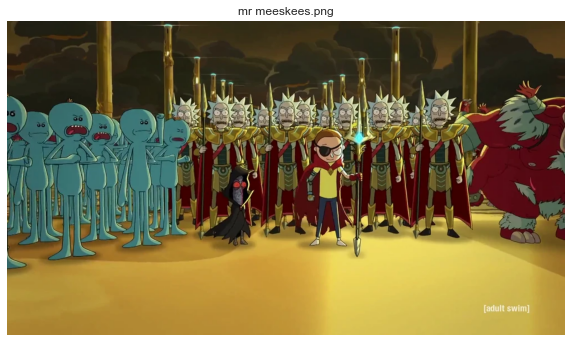

In [95]:
mrmeeseeks = rgb(cv2.imread('data/mr meeskees.png'))
disp(mrmeeseeks, 'mr meeskees.png', s=10)


## Extract Mr. Meeseeks by color

In [96]:
def extract_by_color(image, lower_blue, upper_blue):
    # Convert to hsv
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Threshold the HSV image to get only blue colors
    mask = cv2.inRange(hsv, lower_blue, upper_blue)
    
    # Bitwise AND 'mask' and the original image
    res = cv2.bitwise_and(image, image, mask=mask)
    return res, mask

In [97]:
from ipywidgets import interact

@interact(h_lower=(0,255), h_upper=(0,255), s_lower=(0,255), s_upper=(0,255), v_lower=(0,255), v_upper=(0,255))
def extract_by_color_interactive(hue="", h_lower=100, h_upper=140, saturation="", s_lower=50, s_upper=255, value="", v_lower=50, v_upper=255):
    lower_blue = np.array([h_lower, s_lower, v_lower])
    upper_blue = np.array([h_upper, s_upper, v_upper])
    res, mask = extract_by_color(mrmeeseeks, lower_blue, upper_blue)
    before_after(mrmeeseeks, res, name='"mr meeskees.png"' , effect_name='Extracted')


interactive(children=(Text(value='', description='hue'), IntSlider(value=100, description='h_lower', max=255),…

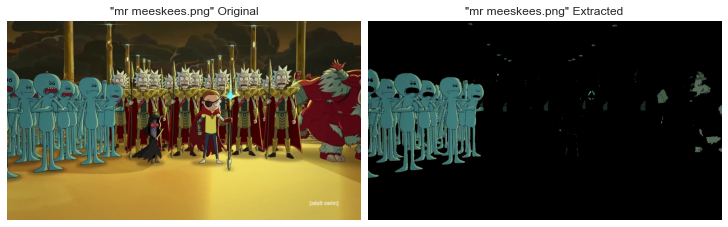

In [98]:
lower_blue = np.array([58, 44, 0])
upper_blue = np.array([101, 255, 200])
res, mask = extract_by_color(mrmeeseeks, lower_blue, upper_blue)
before_after(mrmeeseeks, res, name='"mr meeskees.png"', effect_name='Extracted')

## Applying Garbage Mask

### Creating Garbage Mask

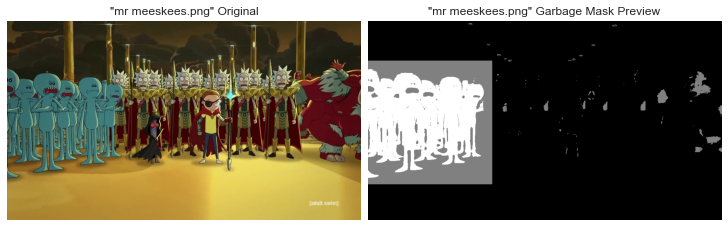

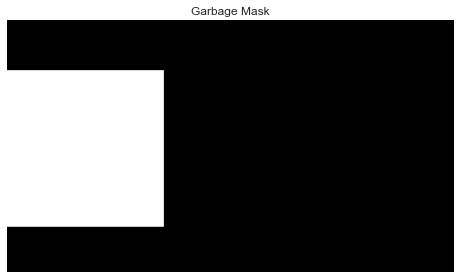

In [99]:
garbage_mask = np.zeros_like(mrmeeseeks)
h, w = garbage_mask.shape[:2]
vertices = [
    [[
        [0, int(0.20*h)], 
        [0, int(0.82*h)], 
        [int(0.35*w), int(0.82*h)], 
        [int(0.35*w), int(0.20*h)]
    ]]
]
cv2.fillPoly(garbage_mask, np.array(vertices), (255, 255, 255))
garbage_mask = cv2.cvtColor(garbage_mask, cv2.COLOR_RGB2GRAY)
# weighted sum garbage mask and image
garbage_mask_preview = cv2.addWeighted(garbage_mask, 0.5, mask, 0.5, 0)
before_after(mrmeeseeks, garbage_mask_preview, name='"mr meeskees.png"', effect_name='Garbage Mask Preview')
disp(garbage_mask, 'Garbage Mask', s=8)

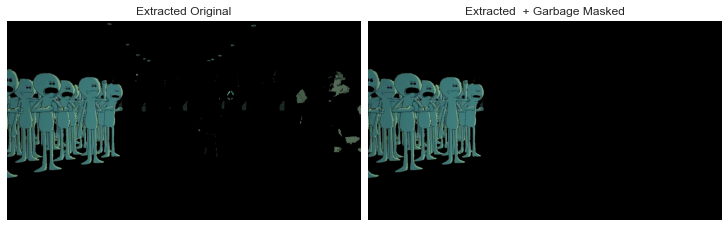

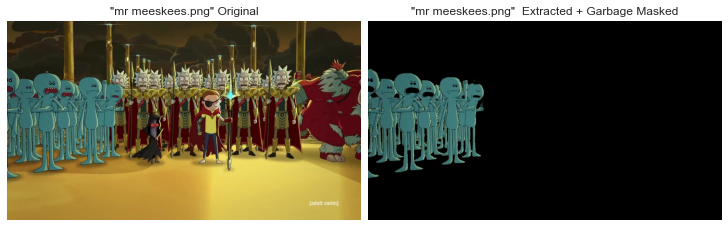

True

In [100]:
# mask the res image using the garbage mask
masked_res = cv2.bitwise_and(res, res, mask=garbage_mask)
before_after(res, masked_res, name='Extracted', effect_name=' + Garbage Masked')
before_after(mrmeeseeks, masked_res, name='"mr meeskees.png"', effect_name=' Extracted + Garbage Masked')
cv2.imwrite('results/question 2/mr meeskees masked.png', bgr(masked_res))